# Importation des bibliothèques et des données

In [1]:

import pandas as pd

import math


trainData_path = 'data.csv'
testData_path = 'test.csv'

trainData = pd.read_csv(trainData_path)
testData= pd.read_csv(testData_path,sep=";")


# Exploration et traitement des données
1. EDA

2. Entrainement des modèles et prédiction

3. Soumission des résultats

## 1. Vue d'ensemble et statistique descriptives



In [2]:
trainData.head(5)

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,4860,0.000013,236.876312,308.575985,3171,7348,0.277021,0.214148,272.726149,0.040834,...,0.043534,0.021311,3.926618,3.026629,102,64740,1253.154541,193816.2765,108925,1
1,2005,0.000010,174.435893,158.661271,1798,5962,0.209676,0.125318,166.548582,0.031859,...,0.137580,0.019412,4.593336,4.676877,79,38670,1357.563486,121864.4404,88000,1
2,12960,0.000019,154.094876,66.137920,1335,9809,0.303533,0.168974,110.116398,0.036623,...,0.207932,0.019402,5.171081,2.851422,81,33010,1583.533172,165641.9190,96545,1
3,7870,0.000012,102.981366,79.647541,1420,6142,0.320674,0.156004,91.314453,0.054545,...,0.080464,0.017964,3.053848,2.758524,74,41340,878.310595,202783.1691,122115,1
4,3590,0.000009,241.464110,143.991636,1557,6218,0.220933,0.163247,192.727873,0.034884,...,0.169032,0.025185,5.383940,3.779826,52,15930,1523.603892,231407.7722,29980,0


In [3]:
testData.head(5)

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
0,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,0.090408,...,163.065803,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220
1,3525,0.000010,126.323599,139.596243,1046,6118,0.225717,0.161174,132.959921,0.026493,...,161.609999,0.070886,0.019476,2.829852,2.596890,95,57310,1690.478712,159928.4527,157135
2,4695,0.000007,170.640009,141.200539,1715,5983,0.182334,0.144740,155.920274,0.028538,...,188.685400,0.140413,0.020751,3.679154,2.357004,85,33965,1578.746651,201469.5285,59430
3,2635,0.000007,261.166647,147.334293,2099,3936,0.620047,0.149459,204.250470,0.112002,...,225.085577,0.091910,0.022776,4.458446,3.211986,93,27320,1491.778917,235001.2465,50155
4,5705,0.000011,331.233476,156.489551,1039,7637,1.373276,0.140836,243.861514,0.260237,...,281.734262,0.200445,0.021218,5.467279,4.374000,74,40415,1876.035259,165849.6658,65224


In [4]:
trainData.shape, testData.shape

((104, 451), (70, 450))

In [5]:
trainData.columns, testData.columns

(Index(['air_time1', 'disp_index1', 'gmrt_in_air1', 'gmrt_on_paper1',
        'max_x_extension1', 'max_y_extension1', 'mean_acc_in_air1',
        'mean_acc_on_paper1', 'mean_gmrt1', 'mean_jerk_in_air1',
        ...
        'mean_jerk_in_air25', 'mean_jerk_on_paper25', 'mean_speed_in_air25',
        'mean_speed_on_paper25', 'num_of_pendown25', 'paper_time25',
        'pressure_mean25', 'pressure_var25', 'total_time25', 'class'],
       dtype='object', length=451),
 Index(['air_time1', 'disp_index1', 'gmrt_in_air1', 'gmrt_on_paper1',
        'max_x_extension1', 'max_y_extension1', 'mean_acc_in_air1',
        'mean_acc_on_paper1', 'mean_gmrt1', 'mean_jerk_in_air1',
        ...
        'mean_gmrt25', 'mean_jerk_in_air25', 'mean_jerk_on_paper25',
        'mean_speed_in_air25', 'mean_speed_on_paper25', 'num_of_pendown25',
        'paper_time25', 'pressure_mean25', 'pressure_var25', 'total_time25'],
       dtype='object', length=450))

In [6]:
x_test=testData.copy()
X_train=trainData.drop("class",axis=1)
y_train=trainData["class"]


In [7]:
# On vérifie si c'est le même nombre de Features dans les deux datasets
list(x_test.columns)==list(X_train.columns)

True

In [8]:
X_train.describe()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.0000,104.000000,104.000000,104.000000,104.000000,...,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,1.040000e+02
mean,5626.096154,0.000010,303.041480,203.341347,1977.903846,7306.0000,0.423505,0.183638,253.191413,0.068408,...,215.379295,0.146058,0.019909,4.299018,2.821636,84.326923,43823.317308,1571.170326,163634.030508,1.696313e+05
std,12288.918491,0.000004,198.980721,125.965315,1224.826752,2118.8762,0.384365,0.068035,144.196343,0.075455,...,61.921768,0.061693,0.002463,1.428521,0.854717,26.300150,21159.386400,372.484321,58168.343395,5.566847e+05
min,65.000000,0.000002,37.102751,47.354990,754.000000,561.0000,0.127188,0.104892,62.040839,0.016190,...,69.928033,0.030169,0.014987,1.323565,0.950249,32.000000,15930.000000,474.049462,26984.926660,2.998000e+04
25%,1706.250000,0.000008,175.765379,121.400481,1373.500000,6058.5000,0.215126,0.148273,160.476470,0.029748,...,182.701413,0.107417,0.018052,3.458191,2.418555,68.000000,33358.750000,1422.034862,121612.064850,5.917500e+04
50%,2965.000000,0.000010,255.791452,175.106066,1691.000000,7004.5000,0.290277,0.167574,224.536120,0.041257,...,208.679273,0.138704,0.019456,4.297580,2.830672,79.000000,37785.000000,1706.121940,158236.771800,7.686500e+04
75%,5130.000000,0.000012,357.088639,241.294922,2188.750000,8320.7500,0.464893,0.196266,298.954539,0.072649,...,259.179787,0.204196,0.020884,4.972020,3.335828,95.250000,45758.750000,1853.738462,198229.616050,1.345438e+05
max,109965.000000,0.000028,1168.328276,865.210522,11195.000000,13493.0000,2.772566,0.627350,836.784702,0.543199,...,430.720710,0.375078,0.026754,10.416715,5.292562,180.000000,139575.000000,1965.069119,352981.850000,5.704200e+06


In [9]:
non_numeric_cols = x_test.select_dtypes(exclude=['number']).columns
print("Colonnes non numériques :", list(non_numeric_cols))


Colonnes non numériques : []


In [10]:
"""#on stocke l'analyse descriptive dans un fichier csv pour mieux visualiser 
X_train.describe().T.to_csv("summary_stats.csv")"""


'#on stocke l\'analyse descriptive dans un fichier csv pour mieux visualiser \nX_train.describe().T.to_csv("summary_stats.csv")'

##2. Traitement des valeurs manquantes

In [11]:
x_test.isnull().any().any(), X_train.isnull().any().any()

(False, False)

In [12]:
"""from ydata_profiling import ProfileReport
import pandas as pd

# Exemple

profile = ProfileReport(X_train, title="EDA Report", minimal=True)
profile.to_file("EDA_report.html")"""


'from ydata_profiling import ProfileReport\nimport pandas as pd\n\n# Exemple\n\nprofile = ProfileReport(X_train, title="EDA Report", minimal=True)\nprofile.to_file("EDA_report.html")'

###Séparation des données selon la task pour une meilleure visualisation

In [13]:
features=list(X_train.columns)
features


['air_time1',
 'disp_index1',
 'gmrt_in_air1',
 'gmrt_on_paper1',
 'max_x_extension1',
 'max_y_extension1',
 'mean_acc_in_air1',
 'mean_acc_on_paper1',
 'mean_gmrt1',
 'mean_jerk_in_air1',
 'mean_jerk_on_paper1',
 'mean_speed_in_air1',
 'mean_speed_on_paper1',
 'num_of_pendown1',
 'paper_time1',
 'pressure_mean1',
 'pressure_var1',
 'total_time1',
 'air_time2',
 'disp_index2',
 'gmrt_in_air2',
 'gmrt_on_paper2',
 'max_x_extension2',
 'max_y_extension2',
 'mean_acc_in_air2',
 'mean_acc_on_paper2',
 'mean_gmrt2',
 'mean_jerk_in_air2',
 'mean_jerk_on_paper2',
 'mean_speed_in_air2',
 'mean_speed_on_paper2',
 'num_of_pendown2',
 'paper_time2',
 'pressure_mean2',
 'pressure_var2',
 'total_time2',
 'air_time3',
 'disp_index3',
 'gmrt_in_air3',
 'gmrt_on_paper3',
 'max_x_extension3',
 'max_y_extension3',
 'mean_acc_in_air3',
 'mean_acc_on_paper3',
 'mean_gmrt3',
 'mean_jerk_in_air3',
 'mean_jerk_on_paper3',
 'mean_speed_in_air3',
 'mean_speed_on_paper3',
 'num_of_pendown3',
 'paper_time3',
 'p

In [14]:
tasks=[]
j=0
for i in range(25):
    tasks.append(X_train[features[j:j+18]])
    j=j+18

###EDA pour les données lié à la task 1 

In [15]:
X=tasks[1].copy()


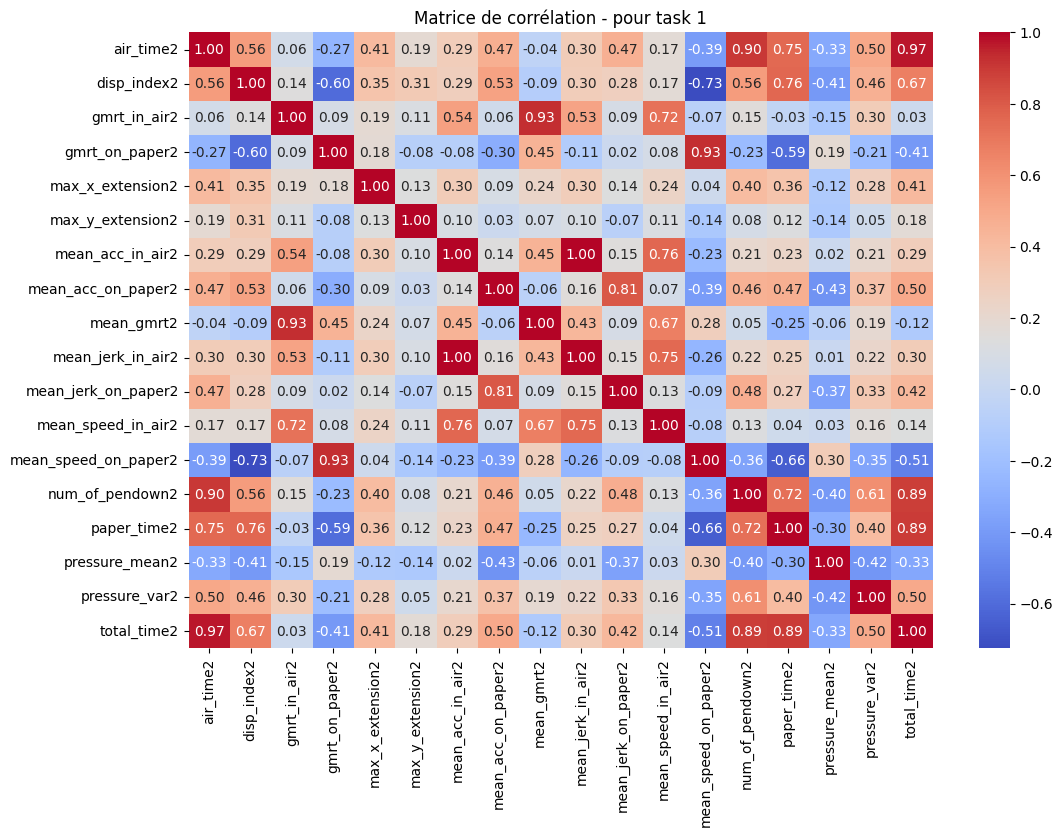

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Calculer la matrice de corrélation
corr = X.corr()

# Afficher la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Matrice de corrélation - pour task 1")
plt.show()

In [17]:
###ACP

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np



#  Normalisation 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ACP avec variance expliquée à 95%
pca = PCA(n_components=0.95)   # le modèle choisit automatiquement le nombre de composantes
X_pca = pca.fit_transform(X_scaled)

print("Nombre de composantes retenues pour 95% de variance :", pca.n_components_)

#  Récupérer l'importance des features
loadings = pca.components_.T   # matrice des contributions
feature_importance = np.sum(np.abs(loadings), axis=1)

# Créer un tableau propre
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance
}).sort_values(by='importance', ascending=False)

print(pca.explained_variance_ratio_)


print("\nFeatures les plus importantes (ACP) :")
print(importance_df)


Nombre de composantes retenues pour 95% de variance : 9
[0.36294458 0.2041611  0.10691148 0.07736494 0.0655117  0.05075904
 0.03571963 0.02827177 0.02630519]

Features les plus importantes (ACP) :
                 feature  importance
15        pressure_mean2    2.536537
16         pressure_var2    2.188476
5       max_y_extension2    2.184315
4       max_x_extension2    1.969500
7     mean_acc_on_paper2    1.944528
2           gmrt_in_air2    1.818691
10   mean_jerk_on_paper2    1.761600
9      mean_jerk_in_air2    1.711500
6       mean_acc_in_air2    1.696551
8             mean_gmrt2    1.592112
1            disp_index2    1.481720
0              air_time2    1.430154
3         gmrt_on_paper2    1.372126
13       num_of_pendown2    1.367649
12  mean_speed_on_paper2    1.342191
14           paper_time2    1.301951
17           total_time2    1.256056
11    mean_speed_in_air2    1.167620


In [18]:

# Calcul de la corrélation de chaque feature avec y
correlations = X.apply(lambda col: col.corr(y_train))

# Convertir en DataFrame pour filtrer et afficher
corr_df = pd.DataFrame({
    'feature': correlations.index,
    'correlation_with_y': correlations.values
})

# Filtrer corrélation < 5% (en valeur absolue)
low_corr = corr_df[np.abs(corr_df['correlation_with_y']) < 0.05]

# Trier optionnellement
low_corr = low_corr.sort_values(by='correlation_with_y')

print(" Features ayant une corrélation < 5% avec la target :\n")
print(low_corr)



 Features ayant une corrélation < 5% avec la target :

      feature  correlation_with_y
8  mean_gmrt2           -0.022736


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


# Créer et entraîner le modèle Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y_train)

# Importance des features
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

print(" Feature importances via Random Forest :\n")
print(feature_importances)

 Feature importances via Random Forest :

                 feature  importance
17           total_time2    0.215957
5       max_y_extension2    0.201596
0              air_time2    0.089924
15        pressure_mean2    0.048519
4       max_x_extension2    0.047770
11    mean_speed_in_air2    0.042543
9      mean_jerk_in_air2    0.041368
2           gmrt_in_air2    0.039674
8             mean_gmrt2    0.036167
6       mean_acc_in_air2    0.036115
1            disp_index2    0.036090
7     mean_acc_on_paper2    0.032045
16         pressure_var2    0.031636
12  mean_speed_on_paper2    0.026567
10   mean_jerk_on_paper2    0.024251
14           paper_time2    0.022514
3         gmrt_on_paper2    0.019961
13       num_of_pendown2    0.007304


In [20]:
tasks[1].shape

(104, 18)

In [21]:
x_test.shape

(70, 450)

## Suppression des features peu importants pour tous les tasks

In [22]:
#Traitement de la data  pour les 25 tasks
threshold=0.05
threshold_bis = 0.97

for i in range(25):
    ##Nettoyage avec matrice de corrélation
    X=tasks[i].copy()
 

    # Calculer la matrice de corrélation absolue
    corr_matrix = X.corr().abs()

    # Créer un masque pour ne garder que la partie supérieure de la matrice (triangle supérieur)
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Identifier les colonnes à supprimer
    to_drop = [column for column in upper.columns if any(upper[column] > threshold_bis)]

    # Supprimer les colonnes
    X= X.drop(columns=to_drop)

    ##Netoyage de donnée avec randomForest 
   

    
    ##Netoyage de donnée avec randomForest 
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y_train)

    # Importance des features
    feature_importances = pd.DataFrame({
        'feature': X.columns,
        'importance': rf.feature_importances_
    }).sort_values(by='importance', ascending=False)

    # Liste des features à garder
    important_features = feature_importances[feature_importances['importance'] >= threshold]['feature'].tolist()

    # Créer un nouveau DataFrame avec seulement les features importantes
    tasks[i] = X[important_features]
    print(tasks[i].shape)




(104, 8)
(104, 5)
(104, 7)
(104, 6)
(104, 5)
(104, 5)
(104, 6)
(104, 7)
(104, 7)
(104, 8)
(104, 8)
(104, 8)
(104, 7)
(104, 8)
(104, 2)
(104, 5)
(104, 5)
(104, 7)
(104, 9)
(104, 6)
(104, 7)
(104, 4)
(104, 5)
(104, 7)
(104, 7)


In [23]:
#on concatène les dataframes du dictionnaire tasks en un seul dataframe
X_train=tasks[0]
for i in range (1,25):
    X_train=pd.concat([X_train,tasks[i]],axis=1)
X_train.shape


(104, 159)

In [24]:
remained_features=list(X_train.columns)
x_test=x_test[remained_features]

In [25]:
#DATA AUGMENTATION


# Paramètre : nombre de nouvelles lignes à générer
n_aug = 100  

# On travaille uniquement sur les features numériques
X_num = X_train.copy()

# Bruit proportionnel à l’écart type de chaque feature
noise_factor = 0.05  # 5% du std

# Sous-échantillonnage avec remplacement (on garde aussi les labels associés)
sampled = X_train.sample(n=n_aug, replace=True, random_state=42)
X_aug = sampled.copy()

# Ajouter du bruit uniquement aux colonnes numériques
for col in X_aug.columns:
    if pd.api.types.is_numeric_dtype(X_aug[col]):
        std = X_aug[col].std()
        noise = np.random.normal(0, noise_factor * std, size=n_aug)
        X_aug[col] += noise

# Target catégorielle → on récupère simplement les labels correspondants
y_aug = y_train.loc[sampled.index].copy()

# Combiner original + augmenté
X_final = pd.concat([X_train, X_aug], axis=0).reset_index(drop=True)
y_final = pd.concat([y_train, y_aug], axis=0).reset_index(drop=True)

X_train=X_final.copy()
y_train=y_final.copy()



### Entrainement du modèle Logistic Regression

In [26]:
#Standardiser les features en cas de besoin 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(x_test)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report





# 3️ Créer et entraîner le modèle
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# 4️ Prédire sur le test set
y_pred = logreg.predict_proba(X_test_scaled)



### Entrainement d'un réseaux de neurones simple

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping






#  Modèle adapté à 200 données

model_rn = Sequential([
    Dense(16, activation="relu", kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(8, activation="relu", kernel_regularizer=l2(0.001)),
    Dropout(0.1),

     Dense(8, activation="relu", kernel_regularizer=l2(0.001)),
    Dropout(0.1),

    Dense(1, activation="sigmoid")  
])

model_rn.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model_rn.summary()


# Early stopping

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=20,
    restore_best_weights=True
)


#  Entraînement

history = model_rn.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,          
    batch_size=8,
    callbacks=[early_stop],
    verbose=1
)


c:\Users\Zoghlami Souad\Documents\dossier_aziz\Data_science\data_science_python_environment\venv_data_science\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,769 (10.82 KB)

 Trainable params: 2,737 (10.69 KB)

 Non-trainable params: 32 (128.00 B)

Epoch 1/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5644 - loss: 0.7717 - val_accuracy: 0.6341 - val_loss: 0.7035
Epoch 2/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5890 - loss: 0.7544 - val_accuracy: 0.6341 - val_loss: 0.6497
Epoch 3/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5706 - loss: 0.7162 - val_accuracy: 0.6341 - val_loss: 0.6269
Epoch 4/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6564 - loss: 0.6562 - val_accuracy: 0.6829 - val_loss: 0.5976
Epoch 5/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7178 - loss: 0.6048 - val_accuracy: 0.6829 - val_loss: 0.5734
Epoch 6/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7730 - loss: 0.5760 - val_accuracy: 0.6829 - val_loss: 0.5499
Epoch 7/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7239 - loss: 0.5584 - val_accuracy: 0.7805 - val_loss: 0.5199
Epoch 8/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8466 - loss: 0.4951 - val_accuracy: 0.7805 

In [29]:
y_pred=model_rn.predict(X_test_scaled)[:, 0]
y_pred

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([0.26381588, 0.2639016 , 0.2637877 , 0.26380485, 0.26364085,
       0.2637575 , 0.26371318, 0.26368475, 0.26376963, 0.26377353,
       0.26379046, 0.26400638, 0.2639109 , 0.26387343, 0.26361376,
       0.263744  , 0.26376104, 0.2636633 , 0.2638517 , 0.2636113 ,
       0.26366234, 0.26374036, 0.26381087, 0.2636857 , 0.26373863,
       0.26369044, 0.26361158, 0.26359758, 0.26354903, 0.26351392,
       0.26357615, 0.26363528, 0.2637112 , 0.26367888, 0.26374412,
       0.26372248, 0.26359066, 0.2635614 , 0.26352566, 0.263617  ,
       0.26361236, 0.2636383 , 0.26361454, 0.26367024, 0.26374662,
       0.2637567 , 0.26361403, 0.26364604, 0.2636014 , 0.26361036,
       0.26360267, 0.2635297 , 0.26369515, 0.2636141 , 0.2636325 ,
       0.2636395 , 0.26356047, 0.2636397 , 0.26353857, 0.2637199 ,
       0.2633368 , 0.26361585, 0.26365066, 0.26372015, 0.2636529 ,
       0.26378414, 0.26362777, 0.2636505 , 0.263716  , 0.2637308 ],
      dtype=float32)

### Entrainement du modèle SVM

In [30]:
from sklearn.svm import SVC
# Créer et entraîner le SVM
svm_model = SVC(kernel='rbf', probability=True, C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Prédictions 
y_pred = svm_model.predict_proba(X_test_scaled)[:, 1]
y_pred

array([9.74740400e-01, 9.83854477e-01, 8.30128299e-01, 9.30889638e-01,
       5.58848351e-02, 6.46407713e-01, 2.93887240e-01, 6.14695198e-01,
       7.13418300e-01, 9.71896614e-01, 8.89110523e-01, 9.62945063e-01,
       9.93198664e-01, 9.84696721e-01, 4.46456988e-01, 6.38660321e-01,
       9.50966627e-01, 8.18230010e-01, 9.31365723e-01, 3.22271829e-01,
       7.71723180e-01, 8.77844217e-01, 9.73336560e-01, 9.73139086e-01,
       8.63183800e-01, 6.80951503e-01, 6.68159775e-02, 8.47873233e-01,
       7.76727809e-03, 1.87125095e-02, 4.20434167e-04, 8.02220846e-01,
       2.72961831e-02, 2.31444620e-01, 2.92488265e-01, 6.13334963e-01,
       4.45090382e-02, 6.19525775e-02, 5.09723366e-03, 1.80707873e-02,
       2.17678919e-03, 1.41026738e-02, 6.63457972e-02, 1.88790725e-02,
       7.75706743e-01, 6.18380862e-01, 1.32337005e-02, 4.27604118e-02,
       2.73185119e-03, 5.75205442e-03, 5.51086735e-02, 6.88742139e-02,
       7.34377398e-01, 1.88577990e-01, 1.27480191e-01, 2.62894012e-01,
      

### Grid-Search avec SVM 

In [31]:
"""from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Modèle SVM
svm_model = SVC(probability=True, random_state=42)

# Grille hyper-gourmande
import numpy as np

import numpy as np

param_grid = [
    # Noyau linéaire
    {
        'kernel': ['linear'],
        'C': np.logspace(-7, 7, 31),  # 31 valeurs de 1e-7 à 1e7
        'gamma': ['scale', 'auto']    # gamma n'est pas utilisé
    },
    # Noyau RBF
    {
        'kernel': ['rbf'],
        'C': np.logspace(-7, 7, 31),
        'gamma': np.logspace(-8, 3, 31).tolist() + ['scale', 'auto']  # 1e-8 à 1e3 + scale/auto
    },
    # Noyau poly
    {
        'kernel': ['poly'],
        'C': np.logspace(-7, 7, 31),
        'gamma': np.logspace(-8, 3, 31).tolist() + ['scale', 'auto'],
        'degree': list(range(2, 9)),  # 2 à 8
        'coef0': [0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10]
    },
    # Noyau sigmoid
    {
        'kernel': ['sigmoid'],
        'C': np.logspace(-7, 7, 31),
        'gamma': np.logspace(-8, 3, 31).tolist() + ['scale', 'auto'],
        'coef0': [0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10]
    }
]



grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Lancer la recherche
grid_search.fit(X_train_scaled, y_train)

# Résultats
print("Best parameters:", grid_search.best_params_)
print("Best ROC-AUC (CV):", grid_search.best_score_)

# Évaluer sur le test set
best_svm = grid_search.best_estimator_
y_prob = best_svm.predict_proba(X_test_scaled)[:, 1]"""

'from sklearn.svm import SVC\nfrom sklearn.model_selection import GridSearchCV\n\n# Modèle SVM\nsvm_model = SVC(probability=True, random_state=42)\n\n# Grille hyper-gourmande\nimport numpy as np\n\nimport numpy as np\n\nparam_grid = [\n    # Noyau linéaire\n    {\n        \'kernel\': [\'linear\'],\n        \'C\': np.logspace(-7, 7, 31),  # 31 valeurs de 1e-7 à 1e7\n        \'gamma\': [\'scale\', \'auto\']    # gamma n\'est pas utilisé\n    },\n    # Noyau RBF\n    {\n        \'kernel\': [\'rbf\'],\n        \'C\': np.logspace(-7, 7, 31),\n        \'gamma\': np.logspace(-8, 3, 31).tolist() + [\'scale\', \'auto\']  # 1e-8 à 1e3 + scale/auto\n    },\n    # Noyau poly\n    {\n        \'kernel\': [\'poly\'],\n        \'C\': np.logspace(-7, 7, 31),\n        \'gamma\': np.logspace(-8, 3, 31).tolist() + [\'scale\', \'auto\'],\n        \'degree\': list(range(2, 9)),  # 2 à 8\n        \'coef0\': [0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10]\n    },\n    # Noyau sigmoid\n    {\n        \'kern

In [32]:
y_pred = svm_model.predict_proba(X_test_scaled)[:, 1]


### Entrainement du modèle RandomForest

In [33]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(
    n_estimators=100,       # nombre d'arbres
    max_depth=None,          # profondeur maximale des arbres (None = pas de limite)
    random_state=42,
    n_jobs=-1                # utiliser tous les cœurs CPU
)

rf_model.fit(X_train, y_train)

#  Prédictions 
y_pred = rf_model.predict_proba(x_test)[:, 1]

## Stacking

In [34]:

from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

# Définir les modèles de base

estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Lr' , LogisticRegression())
    
]

meta_model = SVC(probability=True, kernel='rbf', C=1.0, random_state=42,gamma='scale')


model_stack = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_model,
    cv=5,                
    passthrough=True,   
    n_jobs=-1           
)


model_stack.fit(X_train_scaled, y_train)





,estimators,"[('rf', ...), ('Lr', ...)]"
,final_estimator,SVC(probabili...ndom_state=42)
,cv,5
,stack_method,'auto'
,n_jobs,-1
,passthrough,True
,verbose,0
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2


## XGBoost

In [38]:
from xgboost import XGBClassifier

# Modèle XGBoost 
model_boost = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss'
)

# Entraînement 
model_boost.fit(X_train, y_train)



,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [ ]:
## Bagging

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Modèle base 
base_model = DecisionTreeClassifier(max_depth=None)

# --- Bagging ---
model_bagging = BaggingClassifier(
    base_estimator=base_model,
    n_estimators=100,        # nombre de modèles
    max_samples=0.8,         # fraction d'échantillons bootstrap
    max_features=1.0,        # fraction des features utilisées
    bootstrap=True,          # tirage avec remise (bagging classique)
    random_state=42
)

#  Entraînement 
model_bagging.fit(X_train, y_train)




,estimator,DecisionTreeClassifier()
,n_estimators,100
,max_samples,0.8
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,42
,verbose,0


In [45]:
y_pred = model_bagging.predict_proba(x_test)[:,1]

## Submission

In [36]:
x_test_id = pd.Series(range(70), name="id")

In [46]:
import os

df = pd.DataFrame({'ID': x_test_id,'TARGET': y_pred
})
df.to_csv("prediction.csv", index=False)
print("Fichier 'prediction.csv' créé dans le dossier courant.")

Fichier 'prediction.csv' créé dans le dossier courant.
